In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
from sklearn.metrics import roc_auc_score, precision_score

In [3]:
random.seed(36)
np.random.seed(36)

### [**Breast Cancer Dataset**](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

In [4]:
df = pd.read_csv("./breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df["target"] = df["diagnosis"].apply(lambda x: int(x == "M"))
df = df.drop(["diagnosis", "id"], axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [7]:
def eval_clf(clf, X_test, y_test):
  y_pred = clf.predict(X_test)
  y_score = clf.predict_proba(X_test)[:, 1]
  y_pred = clf.predict(X_test)

  roc_auc = roc_auc_score(y_test, y_score)
  precision = precision_score(y_test, y_pred)

  print(f"ROC-AUC = {roc_auc}\nPrecision = {precision}")

def permutation_feature_importance(clf, X_test, y_test):
  from sklearn.inspection import permutation_importance
  r = permutation_importance(clf, X_test, y_test, n_repeats=100)
  for i in r.importances_mean.argsort()[::-1]:
      if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
          print(f"{df.target[i]:<8}"
                f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}\n")

  fig, ax = plt.subplots()

  pd.Series(r.importances_mean, index=X.columns).plot.bar(yerr=r.importances_std, ax=ax)

  ax.set_title("Feature importances using permutation on full model")
  ax.set_ylabel("Mean accuracy decrease")

  fig.tight_layout()
  plt.show()

### [**Multilayer Perceptron**](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f: \mathbb{R}^m \rightarrow \mathbb{R}^n$ by training on a dataset, where $m$ is the number of dimensions for input and $n$ is the number of dimensions for output.

In [8]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(max_iter=300).fit(X_train, y_train)
eval_clf(clf_mlp, X_test, y_test)

ROC-AUC = 0.9568134171907757
Precision = 0.9795918367346939


In [9]:
y_pred_mlp = clf_mlp.predict(X_test)

### [**Global Surrogate**](https://christophm.github.io/interpretable-ml-book/global.html)
An interpretable model that is trained to approximate the predictions of a black box model. We can draw conclusions about the black box model by interpreting the surrogate model. Solving machine learning interpretability by using more machine learning!

### [**Decision Tree**](https://scikit-learn.org/stable/modules/tree.html)
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_dt = DecisionTreeClassifier().fit(X_test, y_pred_mlp)
eval_clf(clf_dt, X_test, y_test)

ROC-AUC = 0.9472746331236898
Precision = 0.9795918367346939


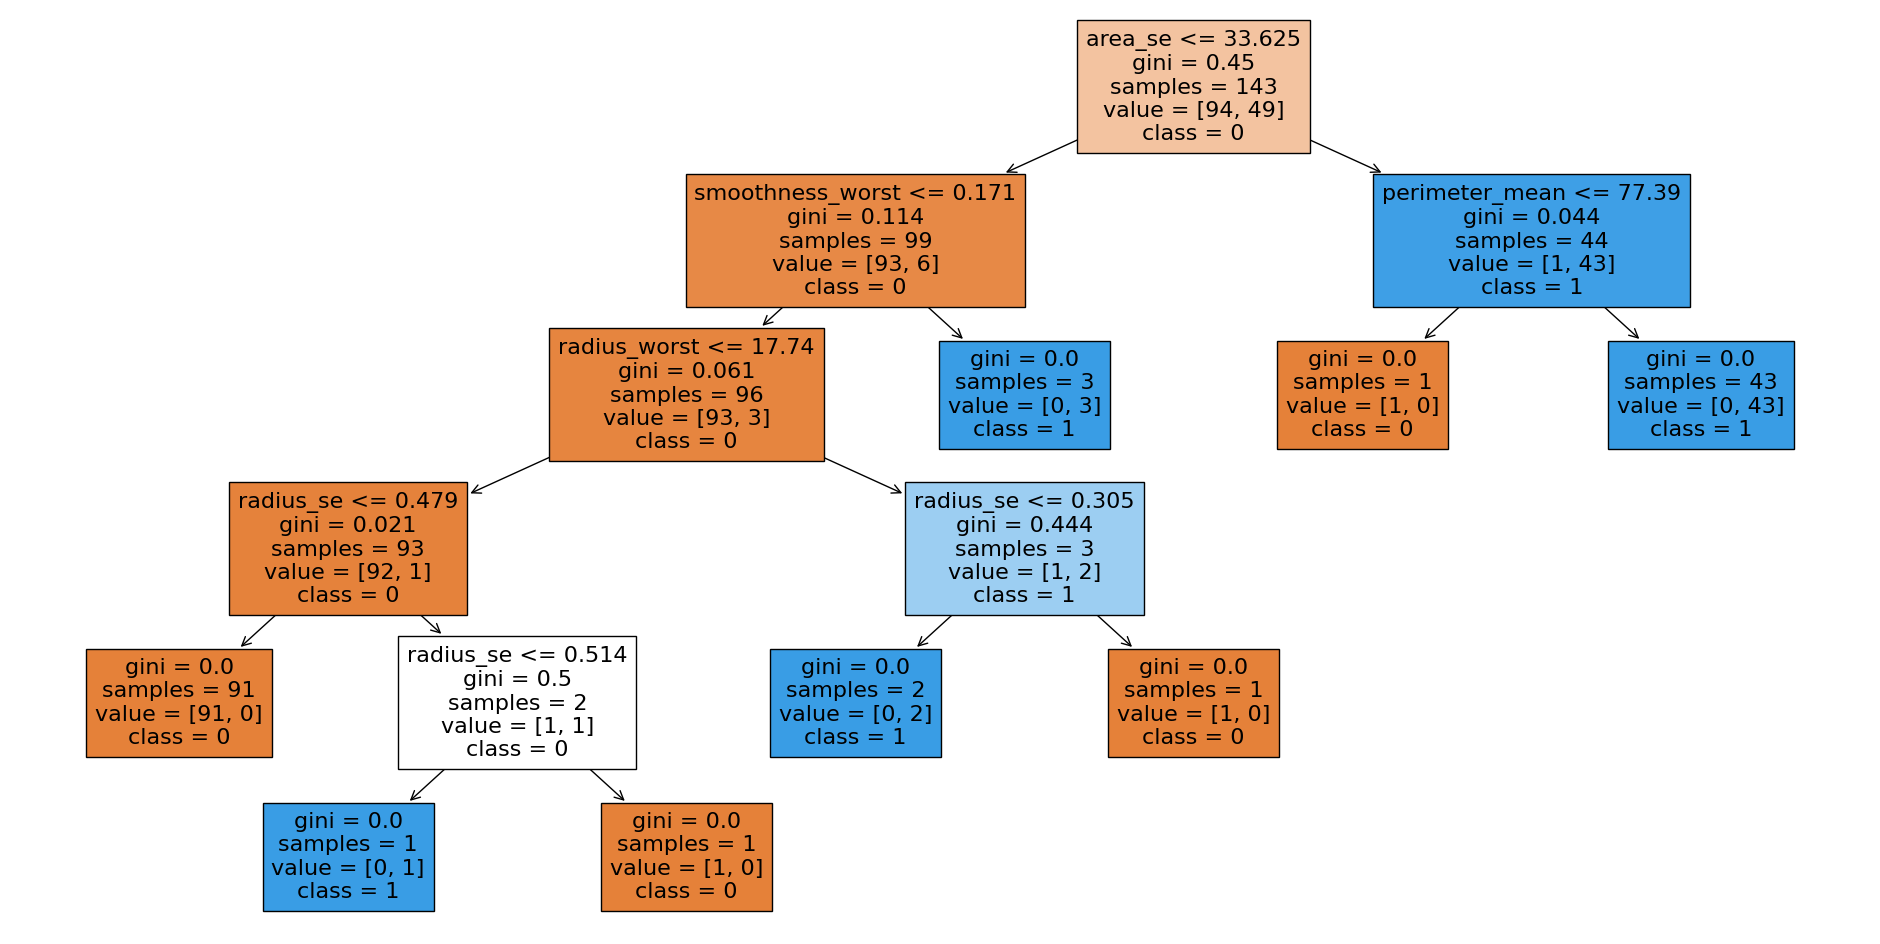

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plot_tree(clf_dt, feature_names=X_test.columns, class_names=list(map(str, clf_dt.classes_)), filled=True)
plt.show()

### **Permutation Feature Importance**
The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled [1]. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

In [12]:
from sklearn.inspection import permutation_importance

##### **Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier().fit(X_train, y_train)
eval_clf(clf_rf, X_test, y_test)

ROC-AUC = 0.9954926624737945
Precision = 0.9454545454545454


0       0.016 +/- 0.006

1       0.007 +/- 0.001



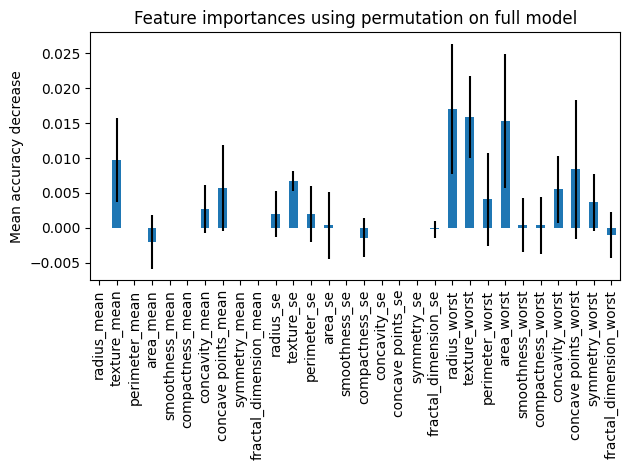

In [14]:
permutation_feature_importance(clf_rf, X_test, y_test)

##### **K-Nearest Neighbors**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf_neigh = KNeighborsClassifier().fit(X_train, y_train)
eval_clf(clf_neigh, X_test, y_test)

ROC-AUC = 0.9556603773584906
Precision = 0.8596491228070176


1       0.356 +/- 0.030

1       0.106 +/- 0.022



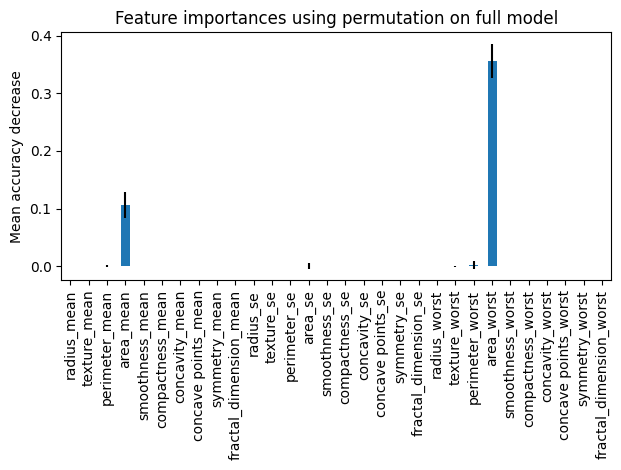

In [16]:
permutation_feature_importance(clf_neigh, X_test, y_test)